# **Project Anime Recommender System**

# **Data understanding**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import textwrap

# Modelling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback
from pathlib import Path

# TfidfVectorizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

# Assuming the anime dataset is stored in a CSV file named 'anime.csv'
file_path_anime = 'anime.csv'

# Load the dataset into a DataFrame
df_anime = pd.read_csv(file_path_anime)

# Display the first few rows of the DataFrame
print(df_anime.head())


   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


In [ ]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
import pandas as pd

# Assuming the rating dataset is stored in a CSV file named 'rating.csv'
file_path_rating = 'rating.csv'

try:
    # Load the dataset into a DataFrame
    df_rating = pd.read_csv(file_path_rating)

    # Display the first few rows of the DataFrame
    print(df_rating.head())
except pd.errors.ParserError as e:
    # Handle the parsing error here
    print("Parsing error occurred:", e)


   user_id  anime_id  rating
0        1        20    -1.0
1        1        24    -1.0
2        1        79    -1.0
3        1       226    -1.0
4        1       241    -1.0


In [ ]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7437901 entries, 0 to 7437900
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   anime_id  int64  
 2   rating    float64
dtypes: float64(1), int64(2)
memory usage: 170.2 MB


In [ ]:
# Printing unique data in each column of the anime dataset
print(f'Dimensions of anime data: {df_anime.shape}')
print('Unique data count in anime_id column: ', len(df_anime['anime_id'].unique()))
print('Unique data count in name column: ', len(df_anime['name'].unique()))
print('Unique data count in type column: ', len(df_anime['type'].unique()))
print('Unique data count in episodes column: ', len(df_anime['episodes'].unique()))
print('Unique data count in genre column: ', len(df_anime['genre'].unique()))
print('Unique data count in rating column: ', len(df_anime['rating'].unique()))
print('Unique data count in members column: ', len(df_anime['members'].unique()))
print('\n')

# Printing unique data in the rating dataset
print(f'Dimensions of rating data: {df_rating.shape}')
print('Unique data count in rating column: ', len(df_rating['rating'].unique()))


Dimensions of anime data: (12294, 7)
Unique data count in anime_id column:  12294
Unique data count in name column:  12292
Unique data count in type column:  7
Unique data count in episodes column:  187
Unique data count in genre column:  3265
Unique data count in rating column:  599
Unique data count in members column:  6706


Dimensions of rating data: (7437901, 3)
Unique data count in rating column:  12



# **Exploited data analysis**

In [ ]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = "RdYlBu"

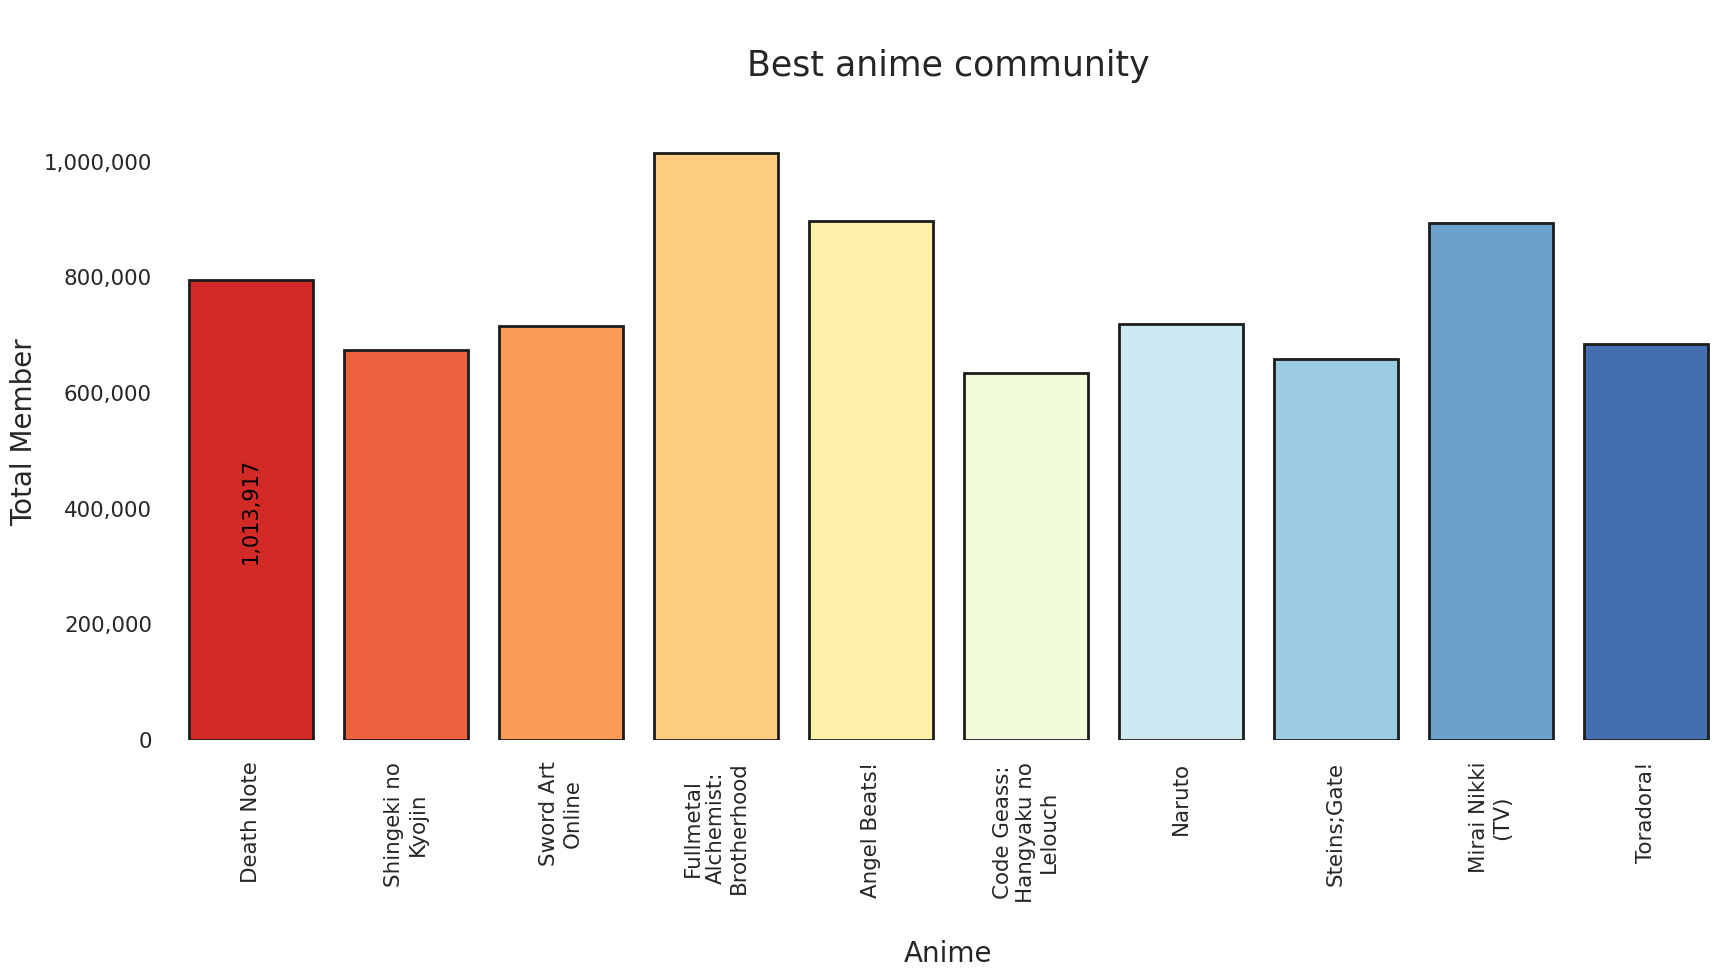

In [ ]:
top_anime = df_anime.copy()
top_anime.drop_duplicates(subset="name", keep="first", inplace=True)
top_anime_temp1 = top_anime.sort_values(["members"], ascending=False)

plt.subplots(figsize=(20, 8))
p = sns.barplot(x=top_anime_temp1["name"][:10], y=top_anime_temp1["members"], palette="RdYlBu", saturation=1, edgecolor="#1c1c1c", linewidth=2)
p.axes.set_title("\nBest anime community\n", fontsize=25)
plt.ylabel("Total Member", fontsize=20)
plt.xlabel("\nAnime", fontsize=20)

# Mengatur formatter sumbu y
p.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Mengatur label sumbu x
labels = [textwrap.fill(label, width=15) for label in top_anime_temp1["name"][:10]]
p.set_xticklabels(labels, rotation=90, ha='center')

for bar, val in zip(p.containers[0], top_anime_temp1["members"][:10]):
    height = bar.get_height()
    width = bar.get_width()
    p.text(bar.get_x() + width / 2, height / 2, '{:,}'.format(int(val)),
                ha='center', va='center', fontsize=15, color="black", rotation=90)

sns.despine(left=True, bottom=True)
plt.show()


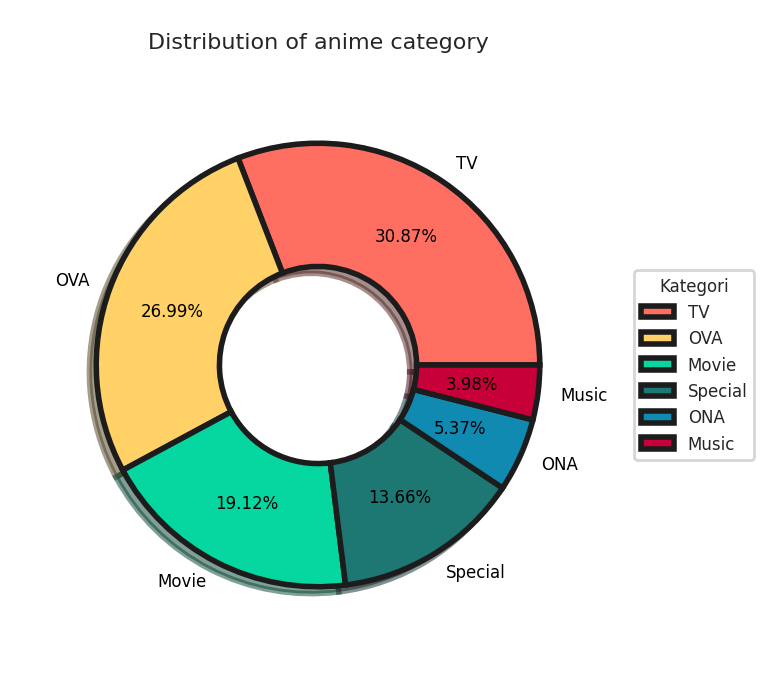

In [ ]:
plt.subplots(figsize=(8, 8))

labels = ["TV","OVA","Movie","Special","ONA","Music"]
size = 0.5

# Warna yang digunakan
colors = ['#FF6F61', '#FFD166', '#06D6A0', "#1d7874", '#118AB2', '#C70039']

# Data untuk pie chart
data = [
    len(top_anime_temp1[top_anime_temp1["type"]=="TV"]["type"]),
    len(top_anime_temp1[top_anime_temp1["type"]=="OVA"]["type"]),
    len(top_anime_temp1[top_anime_temp1["type"]=="Movie"]["type"]),
    len(top_anime_temp1[top_anime_temp1["type"]=="Special"]["type"]),
    len(top_anime_temp1[top_anime_temp1["type"]=="ONA"]["type"]),
    len(top_anime_temp1[top_anime_temp1["type"]=="Music"]["type"])
]

wedges, texts, autotexts = plt.pie(data,
                                    labels=labels,
                                    explode=(0,0,0,0,0,0),
                                    textprops=dict(size=12, color="black"),
                                    autopct="%.2f%%",
                                    pctdistance=0.7,
                                    radius=.9,
                                    colors=colors,
                                    shadow=True,
                                    wedgeprops=dict(width=size, edgecolor="#1c1c1c", linewidth=4),
                                    startangle=0)

plt.legend(wedges, labels, title="Kategori", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12, title_fontsize=12)
plt.title("\nDistribution of anime category", fontsize=16)
plt.show()

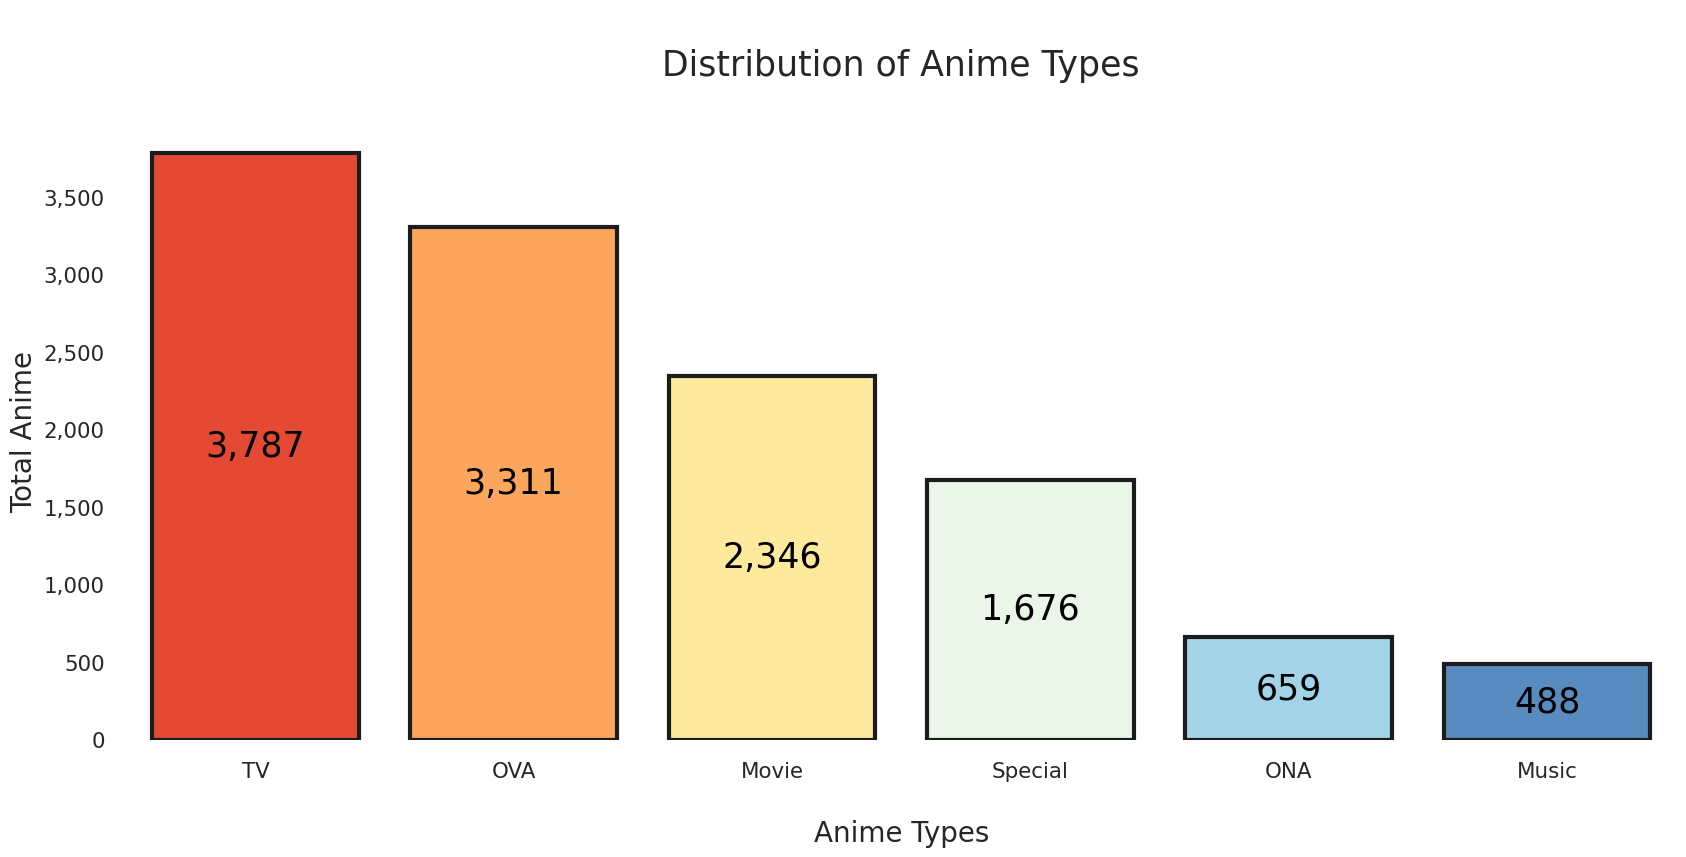

In [ ]:
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=top_anime_temp1["type"], order=top_anime_temp1["type"].value_counts().index, palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=3)
p.axes.set_title("\nDistribution of Anime Types\n", fontsize=25)
plt.ylabel("Total Anime", fontsize=20)
plt.xlabel("\nAnime Types", fontsize=20)
plt.xticks(rotation=0)

# Setting y-axis formatter
p.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Adding labels at the center of bars with formatting
for container in p.containers:
    for bar in container:
        height = bar.get_height()
        p.text(bar.get_x() + bar.get_width() / 2, height / 2, "{:,}".format(int(height)), ha='center', va='center', fontsize=25, color="black")

sns.despine(left=True, bottom=True)
plt.show()


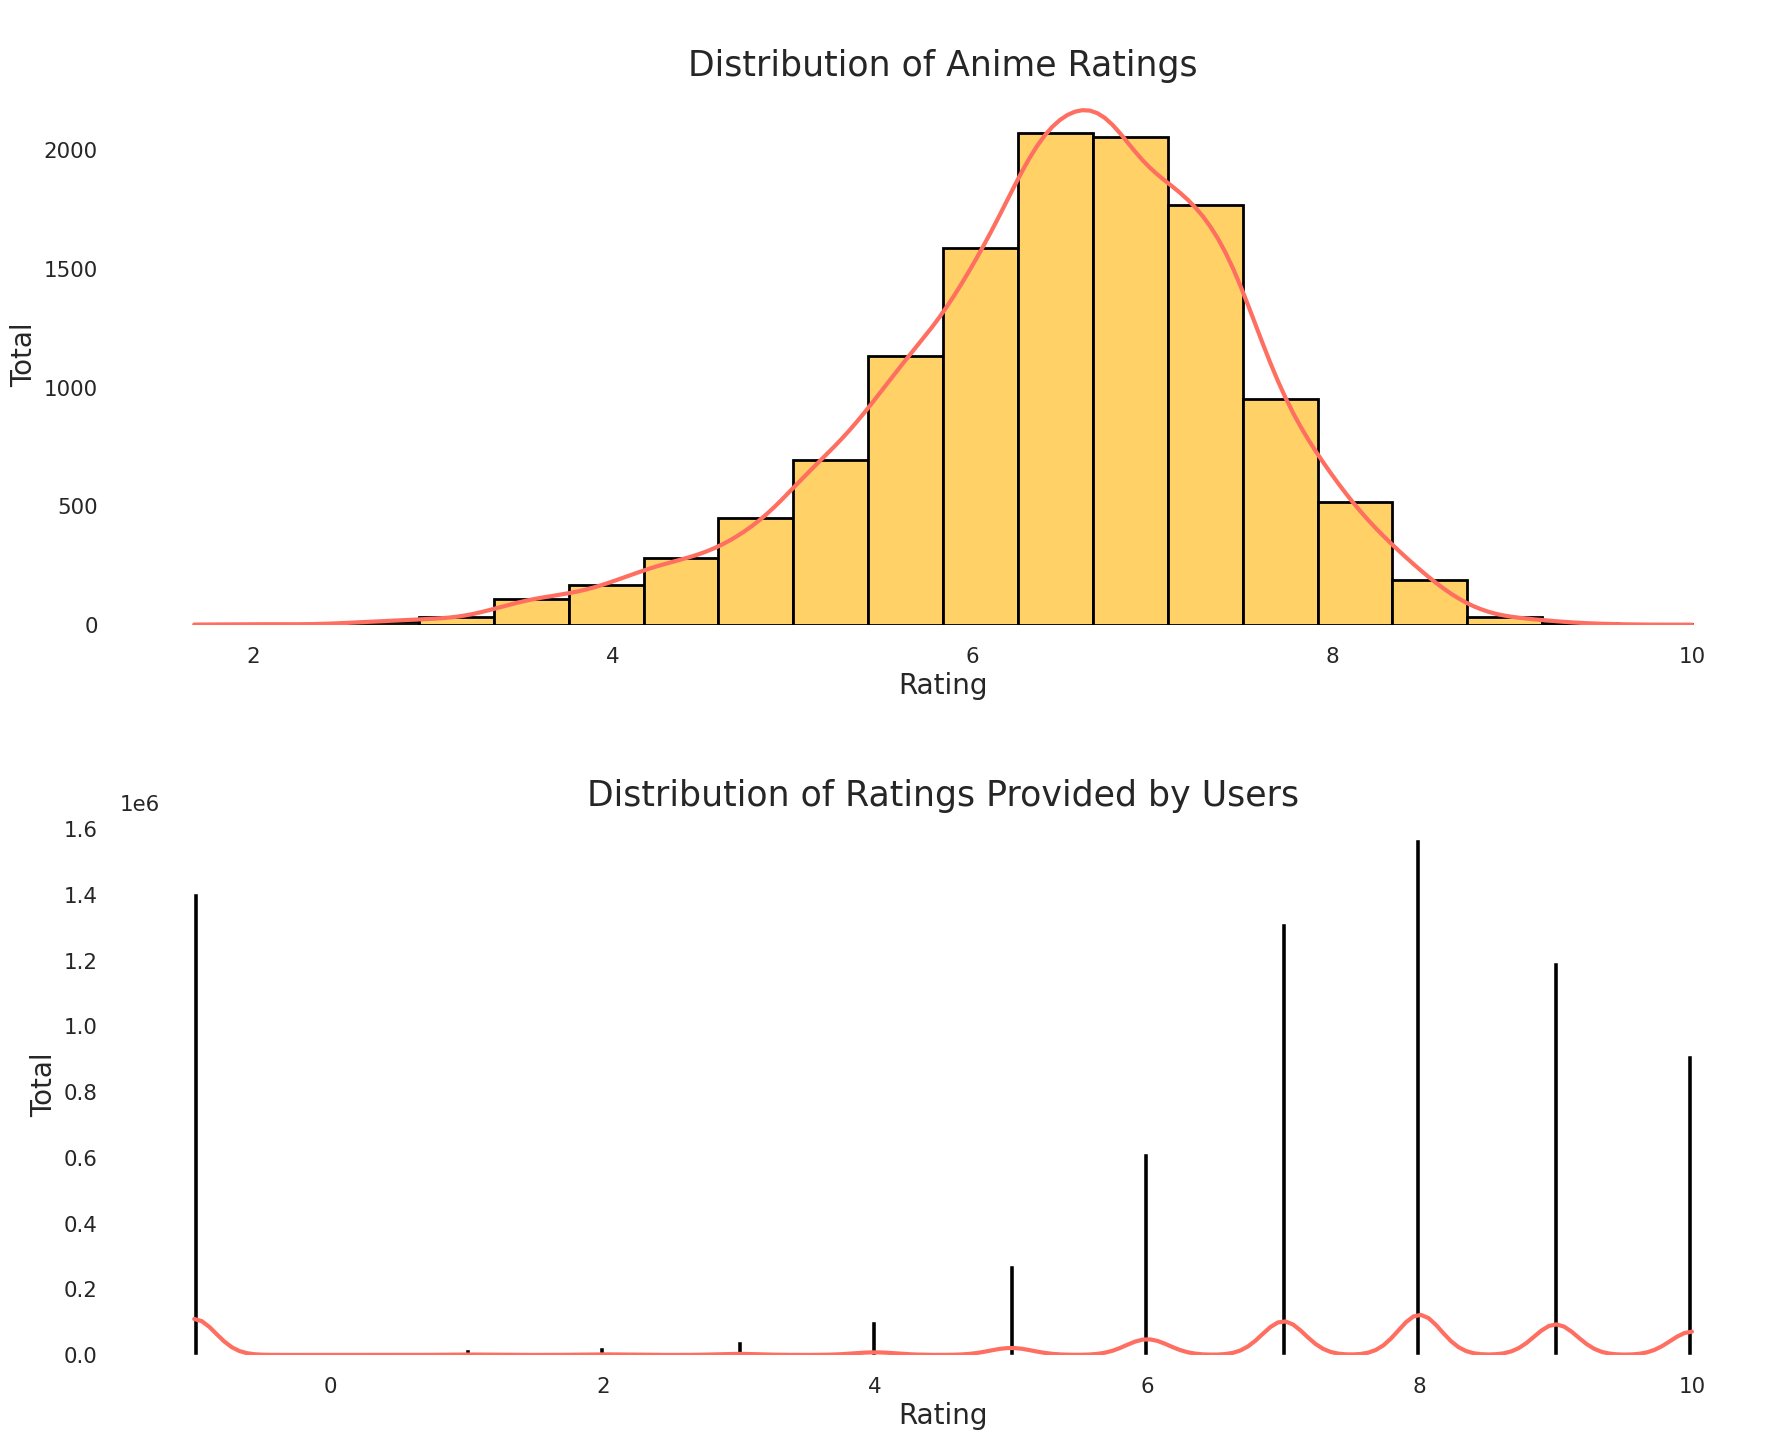

In [ ]:
top_anime_temp2 = top_anime.sort_values(["rating"], ascending=False)

_, axs = plt.subplots(2, 1, figsize=(20, 16), sharex=False, sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"], color=colors[1], kde=True, ax=axs[0], bins=20, alpha=1, fill=True, edgecolor='black')
axs[0].lines[0].set_color(colors[0])
axs[0].set_title("\nDistribution of Anime Ratings", fontsize=25)
axs[0].set_xlabel("Rating\n", fontsize=20)
axs[0].set_ylabel("Total", fontsize=20)

sns.histplot(df_rating["rating"], color='black', kde=True, ax=axs[1], bins="auto", alpha=1, fill=True)
axs[1].lines[0].set_color(colors[0])
axs[1].set_title("\n\n\nDistribution of Ratings Provided by Users", fontsize=25)
axs[1].set_xlabel("Rating", fontsize=20)
axs[1].set_ylabel("Total", fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()


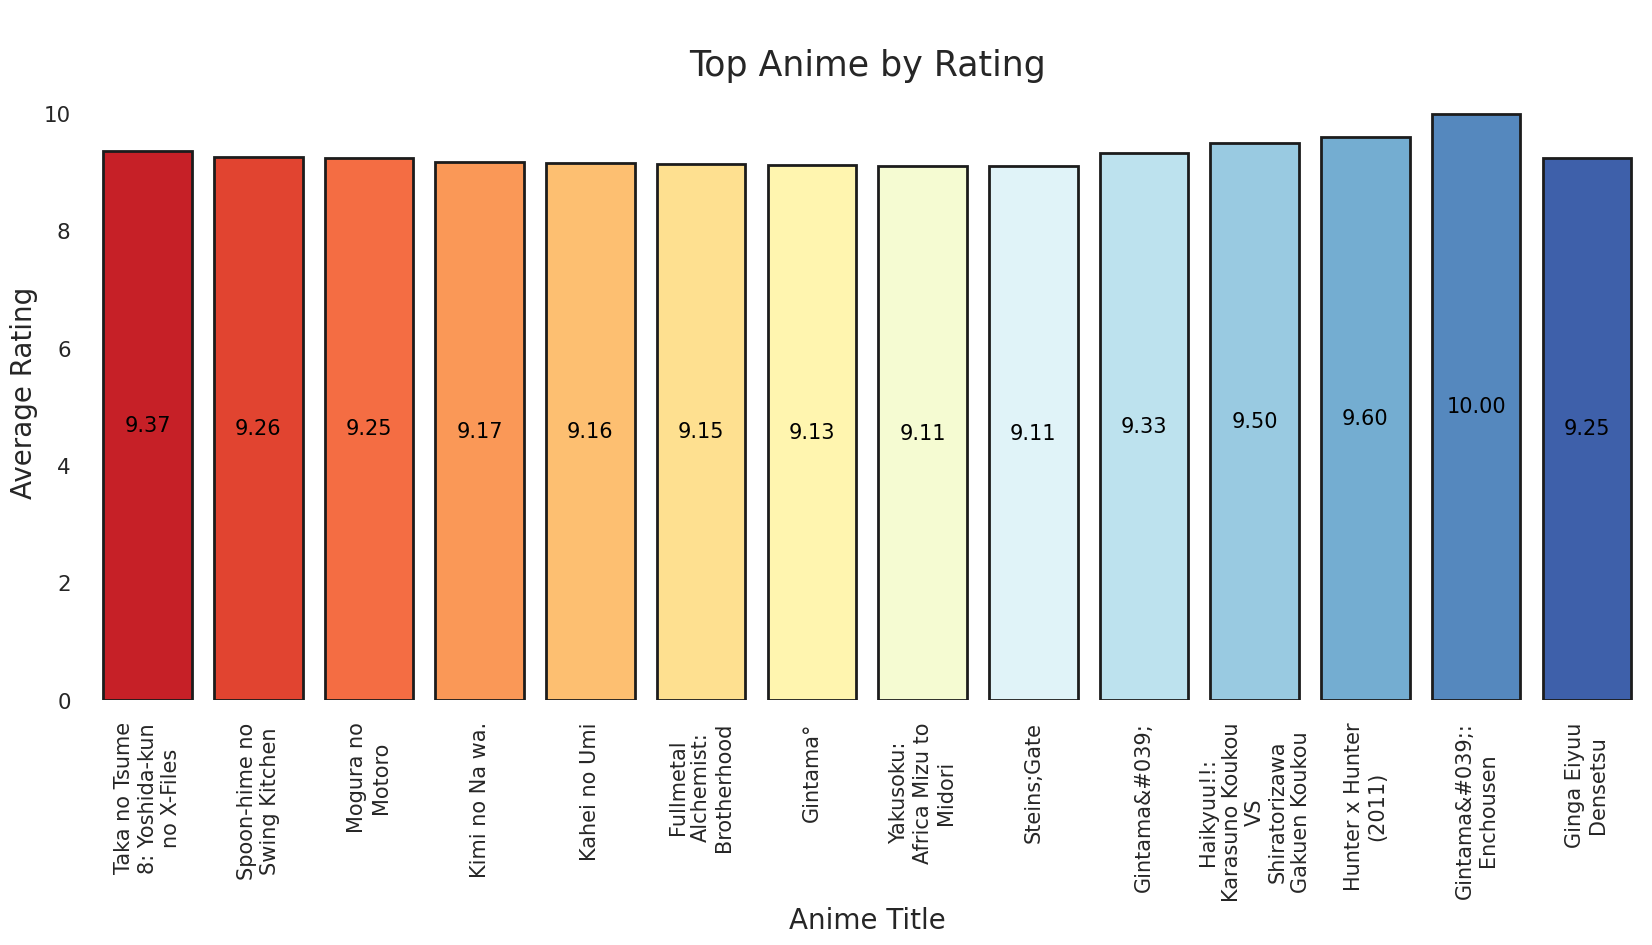

In [ ]:
plt.subplots(figsize=(20, 8))
p = sns.barplot(x=top_anime_temp2["name"][:14], y=top_anime_temp2["rating"], palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=2)
p.axes.set_title("\nTop Anime by Rating", fontsize=25)
plt.ylabel("Average Rating", fontsize=20)
plt.xlabel("Anime Title", fontsize=20)
plt.xticks(rotation=90)

# Set x-axis labels to 2 lines
p.set_xticklabels([textwrap.fill(label, 15) for label in top_anime_temp2["name"][:14]], fontsize=15)

for bar in p.patches:
    # Get the position of the bar
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()

    # Add text in the middle of the bar
    p.text(x + width / 2, y + height / 2, f'{height:.2f}', ha='center', va='center', fontsize=15, color='black')

sns.despine(left=True, bottom=True)
plt.show()


Total unique genres: 44


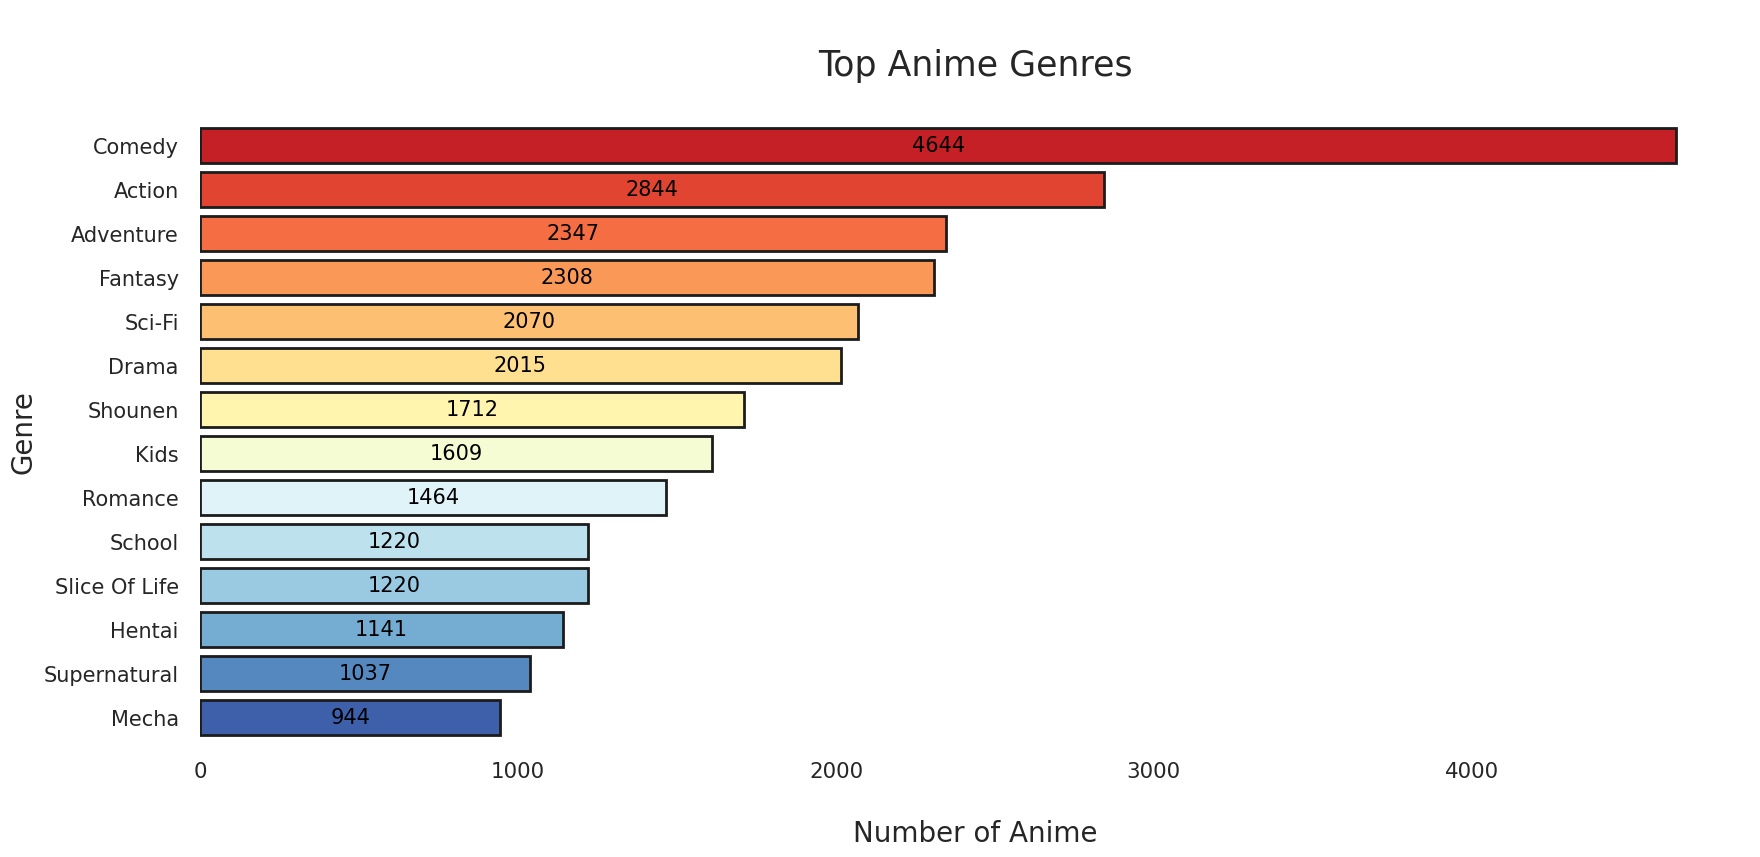

In [ ]:
top_anime_temp3 = top_anime[["genre"]]
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.split(", | , | ,")
top_anime_temp3 = top_anime_temp3.explode("genre")
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.title()

print(f'Total unique genres: {len(top_anime_temp3["genre"].unique())}')

plt.subplots(figsize=(20, 8))
p = sns.barplot(y=top_anime_temp3["genre"].value_counts().index[:14], x=top_anime_temp3["genre"].value_counts()[:14], palette="RdYlBu", saturation=1, edgecolor="#1c1c1c", linewidth=2, orient='h')
p.axes.set_title("\nTop Anime Genres\n", fontsize=25)
plt.xlabel("\nNumber of Anime", fontsize=20)
plt.ylabel("Genre", fontsize=20)

# Set y-axis labels to 2 lines
p.set_yticklabels([textwrap.fill(label, 15) for label in top_anime_temp3["genre"].value_counts().index[:14]], fontsize=15)

for bar in p.patches:
    # Get the position of the bar
    width = bar.get_width()
    height = bar.get_height()
    x = bar.get_x()
    y = bar.get_y()

    # Add text in the middle of the bar
    p.text(x + width / 2, y + height / 2, f'{int(width)}', ha='center', va='center', fontsize=15, color='black')

sns.despine(left=True, bottom=True)
plt.show()


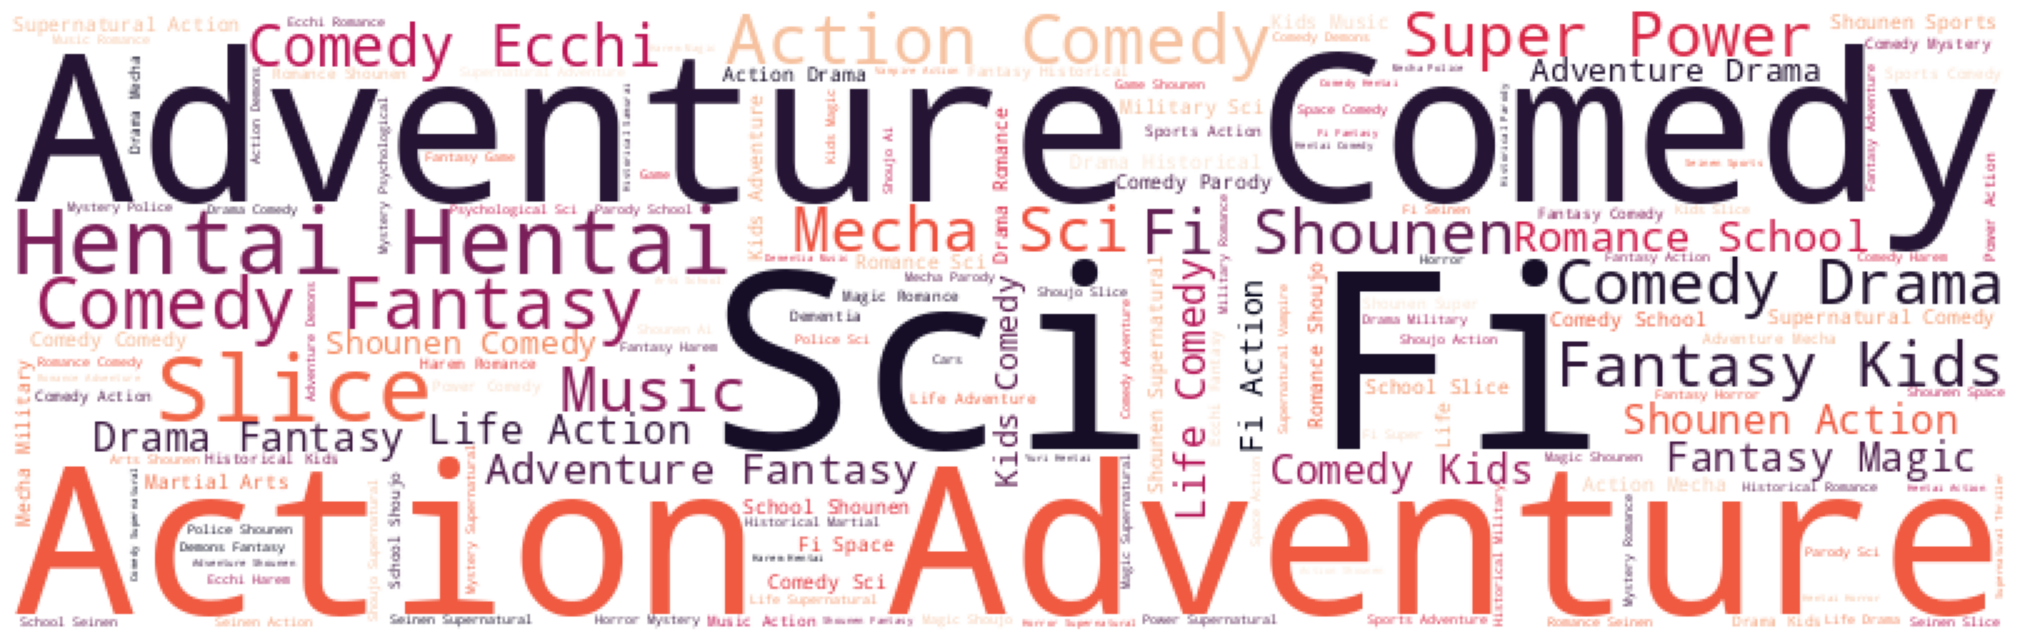

In [ ]:
wordcloud = WordCloud(width=800, height=250, background_color="white", colormap="rocket",
                      max_font_size=100, stopwords=None, repeat=True).generate(top_anime["genre"].str.cat(sep=", | , | ,"))

plt.figure(figsize=(20, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad=0)
plt.show()


# **Data Preparation**

In [ ]:
df_anime.isnull().sum()


anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [ ]:
df_rating.isnull().sum()

user_id     0
anime_id    0
rating      1
dtype: int64

In [ ]:
df_rating["rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
df_rating = df_rating.dropna(axis = 0)

In [ ]:
# Checking for duplicates in the 'anime_id' and 'name' columns in the DataFrame 'df_anime'
duplicate_columns = df_anime.duplicated(subset=['anime_id', 'name'])

# Displaying rows that have duplicate data in these columns
duplicate_data = df_anime[duplicate_columns]

print("Duplicate data in 'df_anime':")
print(duplicate_data)


Duplicate data in 'df_anime':
Empty DataFrame
Columns: [anime_id, name, genre, type, episodes, rating, members]
Index: []


In [ ]:
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)

    return text

df_anime["name"] = df_anime["name"].apply(text_cleaning)

#  1. **Development form with content -based Filtering**

In [ ]:
data_genre = df_anime.copy()
data_genre.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
# Replace NaN values in the 'genre' column with an empty string
data_genre['genre'] = data_genre['genre'].fillna('')

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Compute idf on the selected categories
tfidf.fit(data_genre['genre'])

# Mapping array from integer feature index to feature name
feature_names = tfidf.get_feature_names_out()

print(feature_names)


['action' 'adventure' 'ai' 'arts' 'cars' 'comedy' 'dementia' 'demons'
 'drama' 'ecchi' 'fantasy' 'fi' 'game' 'harem' 'hentai' 'historical'
 'horror' 'josei' 'kids' 'life' 'magic' 'martial' 'mecha' 'military'
 'music' 'mystery' 'of' 'parody' 'police' 'power' 'psychological'
 'romance' 'samurai' 'school' 'sci' 'seinen' 'shoujo' 'shounen' 'slice'
 'space' 'sports' 'super' 'supernatural' 'thriller' 'vampire' 'yaoi'
 'yuri']


In [ ]:
# Carrying out to suit and then turn into the matrix model
tfidf_matrix = tfidf.fit_transform(data_genre['genre'])

# Check the size of the TFIDF matrix
print("TFIDF Matrix Shape:", tfidf_matrix.shape)


TFIDF Matrix Shape: (12294, 47)


In [ ]:
# Change the TF-DF in the matrix with the Todense function ()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29464923, 0.31760665, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.25063144, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
# Create Dataframe to see the TF-IDF matrix
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf.get_feature_names_out(),
    index=data_genre.genre
).sample(22, axis=1).sample(5, axis=0)

,dementia,seinen,psychological,comedy,thriller,ecchi,supernatural,fantasy,sports,of,...,horror,mystery,mecha,music,romance,hentai,kids,sci,action,adventure
genre,,,,,,,,,,,,,,,,,,,,,
"Drama, Mecha, Military, Sci-Fi",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.480467,0.0,0.0,0.0,0.0,0.374746,0.0,0.000000
Hentai,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000
Music,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000
"Comedy, Parody, School",0.0,0.0,0.0,0.337236,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
"Adventure, Comedy, Drama, Mecha, Military, Sci-Fi, Space",0.0,0.0,0.0,0.212754,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.384470,0.0,0.0,0.0,0.0,0.299872,0.0,0.286291


In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.14784981, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14784981, 1.        , 0.1786367 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.1786367 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
# Create data names from Contin_sim variables with rows and columns in the form of names
cosine_sim_df = pd.DataFrame(cosine_sim, index=data_genre['name'], columns=data_genre['name'])
print('Shape:', cosine_sim_df.shape)
# See the similarity matrix in every anime
cosine_sim_df.sample(5, axis=1).sample(5, axis=0)

Shape: (12294, 12294)


name,Time Bokan 2000: Kaitou Kiramekiman,Working!!!: Lord of the Takanashi,Shadow Skill (1996),Naniwa Yuukyouden: Nekketsu!! Bakushou Mankai-hen,Tenjou Tenge
name,,,,,
Closers: Side Blacklambs,0.000000,0.0,0.220028,0.000000,0.000000
Nogsaegjeoncha Haemosu,0.363172,0.0,0.766090,0.357824,0.241056
Unkai no Meikyuu Zeguy,0.433536,0.0,0.569160,0.427152,0.118960
Clarinet Kowashichatta,0.000000,0.0,0.000000,0.000000,0.000000
Totsuzen! Neko no Kuni Banipal Witt,0.394956,0.0,0.479355,0.000000,0.000000


In [ ]:
import os # this makes better error tracing
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# **2. Developing the model with Collaborative Filtering**

In [ ]:
data_cf = df_rating.copy()
data_cf.head()

,user_id,anime_id,rating
47,1,8074,10.0
81,1,11617,10.0
83,1,11757,10.0
101,1,15451,10.0
153,2,11771,10.0


In [ ]:
selected_users = data_cf["user_id"].value_counts()
data_cf = data_cf[data_cf["user_id"].isin(selected_users[selected_users >= 50].index)]

In [ ]:
# Convert user_id to a list without duplicate values
user_ids = data_cf['user_id'].unique().tolist()

# Encode user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}

# Decode encoded user_id back to original user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

# Convert anime_id to a list without duplicate values
anime_ids = data_cf['anime_id'].unique().tolist()

# Encode anime_id
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}

# Decode encoded anime_id back to original anime_id
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}


In [ ]:
# Mapping user_id to the user dataframe
data_cf['user'] = data_cf['user_id'].map(user_to_user_encoded)

# Mapping anime_id to the anime dataframe
data_cf['anime'] = data_cf['anime_id'].map(anime_to_anime_encoded)


In [ ]:
# Get the number of users
num_users = len(user_to_user_encoded)

# Get the number of anime
num_anime = len(anime_to_anime_encoded)

# Convert rating to float values
data_cf['rating'] = data_cf['rating'].values.astype(np.float32)

# Minimum rating value
min_rating = min(data_cf['rating'])

# Maximum rating value
max_rating = max(data_cf['rating'])

print('Number of Users: {}, Number of anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))


Number of Users: 31212, Number of anime: 9900, Min Rating: 1.0, Max Rating: 10.0


In [ ]:
# Shuffle the dataset
data_cf = data_cf.sample(frac=1, random_state=42)
data_cf.head()


,user_id,anime_id,rating,user,anime
7415415,69149,10793,9.0,31099,817
3703970,34597,28391,8.0,15656,662
5351514,50678,678,6.0,22701,5693
6303225,58631,18857,7.0,26419,425
3094842,28601,2248,9.0,13029,192


In [ ]:
# Create variable x to concatenate user and anime data into a single value
x = data_cf[['user', 'anime']].values

# Create variable y to scale the ratings
y = data_cf['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Split into 80% train data and 20% validation data
train_indices = int(0.8 * data_cf.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)


In [ ]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_anime, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_anime = num_anime
        self.embedding_size = embedding_size

        # Embedding layers
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6),
            name='user_embedding'
        )
        self.anime_embedding = layers.Embedding(
            num_anime,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6),
            name='anime_embedding'
        )

        # Bias layers
        self.user_bias = layers.Embedding(num_users, 1)
        self.anime_bias = layers.Embedding(num_anime, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0]) # Embedding user
        anime_vector = self.anime_embedding(inputs[:, 1]) # Embedding anime

        # Retrieve biases
        user_bias = self.user_bias(inputs[:, 0])
        anime_bias = self.anime_bias(inputs[:, 1])

        # Compute dot product between embeddings
        dot_user_anime = tf.tensordot(user_vector, anime_vector, 2)

        # Add biases
        x = dot_user_anime + user_bias + anime_bias

        return tf.nn.sigmoid(x)


In [ ]:
model = RecommenderNet(num_users, num_anime, 128)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
class RMSECallback(Callback):
    def __init__(self, threshold):
        super(RMSECallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        if logs['root_mean_squared_error'] < self.threshold:
            print(f"\nValidation RMSE has reached {self.threshold}. Stopping training.")
            self.model.stop_training = True

callback = RMSECallback(threshold=0.1)

In [ ]:
# Start training
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=4,
    validation_data=(x_val, y_val),
    callbacks=[callback]
)



Epoch 1/4
33947/33947 [==============================] - 2689s 79ms/step - loss: 0.5646 - root_mean_squared_error: 0.1788 - val_loss: 0.5470 - val_root_mean_squared_error: 0.1555
Epoch 2/4
33947/33947 [==============================] - 2879s 85ms/step - loss: 0.5427 - root_mean_squared_error: 0.1504 - val_loss: 0.5404 - val_root_mean_squared_error: 0.1468
Epoch 3/4
33947/33947 [==============================] - 2818s 83ms/step - loss: 0.5377 - root_mean_squared_error: 0.1439 - val_loss: 0.5368 - val_root_mean_squared_error: 0.1421
Epoch 4/4
33947/33947 [==============================] - 2747s 81ms/step - loss: 0.5348 - root_mean_squared_error: 0.1401 - val_loss: 0.5346 - val_root_mean_squared_error: 0.1392


In [ ]:
# Save the model in TensorFlow SavedModel format
model.save("my_model", save_format="tf")

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
anime_df = df_anime[['anime_id', 'name', 'genre', 'type']]
df = df_rating.copy()

# Get a sample user
user_id = df.user_id.sample(1).iloc[0]
anime_rated_by_user = df[df.user_id == user_id]

# Using bitwise operator (~), see more here: https://docs.python.org/3/reference/expressions.html
anime_not_rated = anime_df[~anime_df['anime_id'].isin(anime_rated_by_user.anime_id.values)]['anime_id']
anime_not_rated = list(
    set(anime_not_rated)
    .intersection(set(anime_to_anime_encoded.keys()))
)

anime_not_rated = [[anime_to_anime_encoded.get(x)] for x in anime_not_rated]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_rated), anime_not_rated)
)

In [ ]:
ratings = model.predict(user_anime_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_rated[x][0]) for x in top_ratings_indices
]

print('Showing best anime recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Anime with high ratings from user')
print('----' * 8)

top_recommend_user = (
    anime_rated_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)

anime_df_rows = anime_df[anime_df['anime_id'].isin(top_recommend_user)]
for row in anime_df_rows.itertuples():
    print(row.name, ':', row.genre)

print('----' * 8)
print('Top 10 Anime recommendation')
print('----' * 8)

recommended_anime = anime_df[anime_df['anime_id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.name, ':', row.genre)

# **3- Developing the model with Hybrid Model**

In [ ]:
# import required libraries
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from lightfm.evaluation import auc_score
from lightfm.data import Dataset

In [ ]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

In [ ]:
n_user = 5000
rating_selected = rating.head(np.where(rating['user_id'] == n_user)[0][-1] + 1)
rating_selected['rating'].replace({-1: 0}, inplace=True)
user_anime_interaction = pd.pivot_table(
    rating_selected, index='user_id', columns='anime_id', values='rating'
)
user_anime_interaction.fillna(0, inplace=True)
user_anime_csr = csr_matrix(user_anime_interaction.values)
n_users, n_items = user_anime_interaction.shape

<ipython-input-3-7e40b581bbb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_selected['rating'].replace({-1: 0}, inplace=True)


In [ ]:
nanime = anime.set_index('anime_id')
nuser = rating_selected.set_index('user_id')
total_genres = sorted(
    set(map(lambda x: x.strip(), ','.join(map(lambda x: str(x), anime['genre'].values)).split(','))))[:-1]


def create_UserFeature(
    rating_selected, start_id=1, end_id=n_user, new_user=False, new_user_id=n_user + 1, new_userDat={}
):
    user_data = []
    for user_id in range(start_id, end_id + 1):
        filter_user = nuser.loc[user_id].iloc[np.where(nuser.loc[user_id]['rating'] != 0)]
        total_anime_watch = len(filter_user)

        if total_anime_watch == 0:
            genres_user = list()
        else:
            genres_user = nanime.loc[filter_user['anime_id']]['genre']

            if isinstance(genres_user, str):
                genres_user = [genres_user]
            else:
                genres_user = genres_user.values

        user_gen_dat = {}
        all_genres = (','.join(map(lambda x: str(x), genres_user))).split(',')
        total_anime_watch = total_anime_watch if total_anime_watch else 1

        for unique_gen in total_genres:
            user_gen_dat[unique_gen] = all_genres.count(unique_gen) / total_anime_watch

        user_data.append([user_id, user_gen_dat])

    return user_data


dataset = Dataset(user_identity_features=False)
dataset.fit(
    np.arange(1, n_user + 1),
    rating_selected.sort_values(by='anime_id')['anime_id'].unique(),
    user_features=total_genres,
    item_features=["Name"],
)
user_features = dataset.build_user_features(create_UserFeature(rating_selected), normalize=True)

<ipython-input-4-32ab1a357920>:12: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  filter_user = nuser.loc[user_id].iloc[np.where(nuser.loc[user_id]['rating'] != 0)]
<ipython-input-4-32ab1a357920>:12: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  filter_user = nuser.loc[user_id].iloc[np.where(nuser.loc[user_id]['rating'] != 0)]
<ipython-input-4-32ab1a357920>:12: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, 

In [ ]:
model = LightFM(loss='warp')
model = model.fit(
    user_anime_csr,
    user_features=user_features,
    epochs=100,
    num_threads=16,
    verbose=True
)

Epoch: 100%|██████████| 100/100 [02:41<00:00,  1.61s/it]


In [ ]:
def recommendME(model, anime, dataset, user_id=None, new_user_feature=None, k=5):
    nanime = anime.set_index('anime_id')
    if user_id is None:
        user_id = n_users + 1
    if user_id > n_users:
        for genre in total_genres:
            if genre not in list(new_user_feature.keys()):
                new_user_feature[genre] = 0
        dataset.fit_partial(users=[user_id], user_features=total_genres)
        new_user_feature = [user_id, new_user_feature]
        new_user_feature = dataset.build_user_features([new_user_feature], normalize=False)
    user_id_map = dataset.mapping()[0][user_id]
    scores = model.predict(user_id_map, np.arange(n_items), user_features=new_user_feature)
    rank = np.argsort(-scores)
    selected_anime_id = np.array(list(dataset.mapping()[2].keys()))[rank]
    top_items = nanime.loc[selected_anime_id]

    return top_items['name'][:k].values

In [ ]:
recommendations = recommendME(
    model,
    anime,
    dataset,
    new_user_feature={'Drama': 0.5, 'Fantasy': 0.75, 'Harem': 0.9, 'Hentai': 0, 'Comedy': 0.96}
)
print(recommendations)


['Brothers Conflict' 'Diabolik Lovers' 'Amnesia' 'Sukitte Ii na yo.'
 'Uta no☆Prince-sama♪ Maji Love 1000%']


In [ ]:
# Adding new user and giving top k anime recommendation
def recommendME(model,anime,dataset,user_id=None,new_user_feature=None,k=5):
  nanime=anime.set_index('anime_id')
  if user_id is None:
    user_id = n_users +1
  if user_id > n_users:
    for genre in total_genres:
      if genre not in list(new_user_feature.keys()):
        new_user_feature[genre] = 0
    dataset.fit_partial(users=[user_id],user_features=total_genres)
    # My Feature matrix
    # new_user_feature = [user_id,{' Adventure': 0.11764705882352941, ' Cars': 0.0, ' Comedy': 0.23529411764705882, ' Dementia': 0.0, ' Demons': 0.058823529411764705, ' Drama': 0.17647058823529413, ' Ecchi': 0.058823529411764705, ' Fantasy': 0.35294117647058826, ' Game': 0.058823529411764705, ' Harem': 0.0, ' Hentai': 0.0, ' Historical': 0.0, ' Horror': 0.058823529411764705, ' Josei': 0.0, ' Kids': 0.0, ' Magic': 0.11764705882352941, ' Martial Arts': 0.0, ' Mecha': 0.058823529411764705, ' Military': 0.11764705882352941, ' Music': 0.0, ' Mystery': 0.058823529411764705, ' Parody': 0.058823529411764705, ' Police': 0.17647058823529413, ' Psychological': 0.17647058823529413, ' Romance': 0.23529411764705882, ' Samurai': 0.0, ' School': 0.29411764705882354, ' Sci-Fi': 0.17647058823529413, ' Seinen': 0.11764705882352941, ' Shoujo': 0.058823529411764705, ' Shoujo Ai': 0.0, ' Shounen': 0.29411764705882354, ' Shounen Ai': 0.0, ' Slice of Life': 0.17647058823529413, ' Space': 0.0, ' Sports': 0.058823529411764705, ' Super Power': 0.17647058823529413, ' Supernatural': 0.47058823529411764, ' Thriller': 0.17647058823529413, ' Vampire': 0.0, ' Yaoi': 0.0, ' Yuri': 0.0, 'Action': 0.47058823529411764, 'Adventure': 0.058823529411764705, 'Cars': 0.0, 'Comedy': 0.11764705882352941, 'Dementia': 0.0, 'Demons': 0.0, 'Drama': 0.23529411764705882, 'Ecchi': 0.0, 'Fantasy': 0.0, 'Game': 0.0, 'Harem': 0.0, 'Hentai': 0.0, 'Historical': 0.0, 'Horror': 0.0, 'Josei': 0.0, 'Kids': 0.0, 'Magic': 0.0, 'Martial Arts': 0.0, 'Mecha': 0.0, 'Military': 0.0, 'Music': 0.0, 'Mystery': 0.058823529411764705, 'Parody': 0.0, 'Police': 0.0, 'Psychological': 0.0, 'Romance': 0.0, 'Samurai': 0.0, 'School': 0.0, 'Sci-Fi': 0.058823529411764705, 'Seinen': 0.0, 'Shoujo': 0.0, 'Shounen': 0.0, 'Slice of Life': 0.0, 'Space': 0.0, 'Sports': 0.0, 'Super Power': 0.0, 'Supernatural': 0.0, 'Thriller': 0.0, 'Vampire': 0.0, 'Yaoi': 0.0} ]
    new_user_feature = [user_id,new_user_feature]
    new_user_feature = dataset.build_user_features([new_user_feature],normalize=False)
  user_id_map = dataset.mapping()[0][user_id] # just user_id -1
  scores = model.predict(user_id_map, np.arange(n_items),user_features=new_user_feature)
  rank = np.argsort(-scores)
  selected_anime_id =np.array(list(dataset.mapping()[2].keys()))[rank]
  top_items = nanime.loc[selected_anime_id]

  return top_items['name'][:k].values


In [ ]:
 #Model AUC: 98... and Precision at K 0.60
# for me : split data  into train and test and evaluate model on that
train_k = precision_at_k(model,user_anime_csr,user_features=user_features)

train_auc = auc_score(model, user_anime_csr, num_threads=16,user_features=user_features).mean()

print('Collaborative filtering train AUC: {} \n Precision at k users {} '.format(train_auc , train_k.mean()))


Collaborative filtering train AUC: 0.956286609172821 
 Precision at k users 0.46330568194389343 


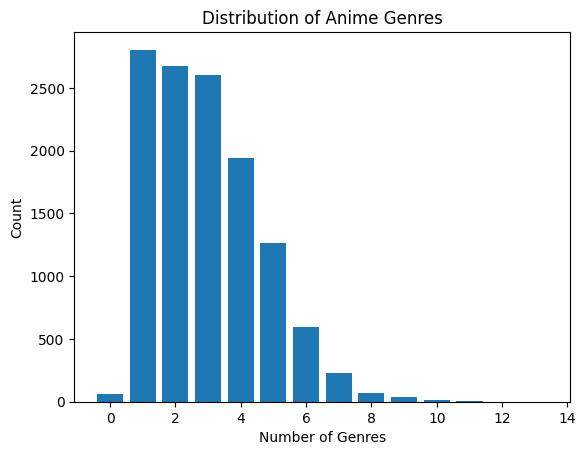

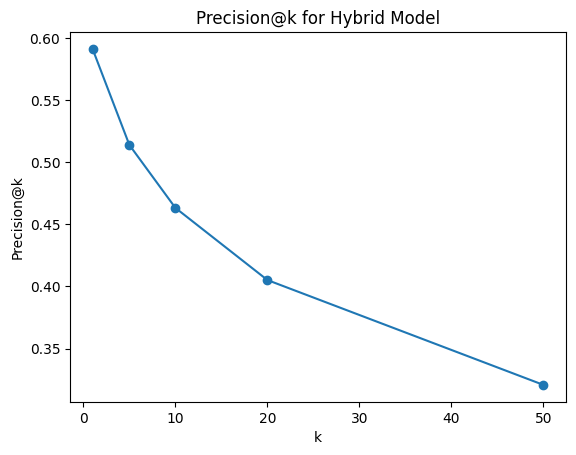

In [ ]:
# Count the number of animes per genre
genre_counts = anime['genre'].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 0).value_counts()

# Create a bar plot
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Number of Genres')
plt.ylabel('Count')
plt.title('Distribution of Anime Genres')
plt.show()

# Step 9: Draw a plot

# Calculate the precision at k for different values of k
k_values = [1, 5, 10, 20, 50]
precisions = []

for k in k_values:
    precision = precision_at_k(model, user_anime_csr, user_features=user_features, k=k).mean()
    precisions.append(precision)

# Create a line plot
plt.plot(k_values, precisions, marker='o')
plt.xlabel('k')
plt.ylabel('Precision@k')
plt.title('Precision@k for Hybrid Model')
plt.show()

# **Developing the model with Knowledge-Based Recommendations**

Enter your preferred type of anime (e.g.,Music,Special, TV, Movie, OVA):
OVA
Enter your preferred genre:
fantasy
Enter your preferred minimum rating:
7.15
Recommended Anime:
                                             name type  \
10136                   Santa-san wa Dai Isogashi  OVA   
9567                             Minna no Doutoku  OVA   
52               Kamisama Hajimemashita: Kako-hen  OVA   
9015                        Jidou Bungaku Library  OVA   
125           Shingeki no Kyojin: Kuinaki Sentaku  OVA   
133                    Tsubasa: Tokyo Revelations  OVA   
147                  Kuroshitsuji: Book of Murder  OVA   
155      Natsume Yuujinchou: Itsuka Yuki no Hi ni  OVA   
9910   Oz no Mahoutsukai no Koutsuu Anzen no Tabi  OVA   
286                            Tsubasa: Shunraiki  OVA   

                                                   genre  rating  
10136                                      Fantasy, Kids    9.00  
9567            Drama, Fantasy, Historical, Kids, Sch

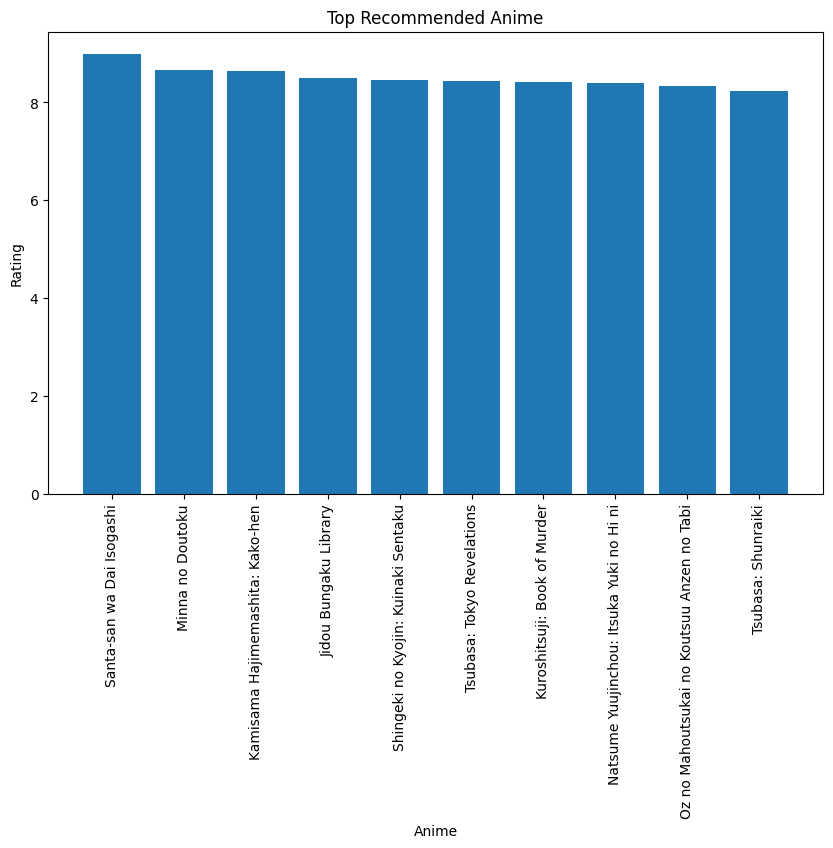

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the anime dataset
anime_df = pd.read_csv('anime.csv')

def knowledge_based_recommendations(anime_df, preferred_type, preferred_genre, preferred_rating):
    # Filter based on preferred type, genre, and rating
    recommended_anime = anime_df[(anime_df['type'] == preferred_type) &
                                 (anime_df['genre'].str.contains(preferred_genre, case=False)) &
                                 (anime_df['rating'] >= preferred_rating)]

    # Sort by rating in descending order
    recommended_anime = recommended_anime.sort_values('rating', ascending=False)

    return recommended_anime

# Prompt the user for preferred anime characteristics
print("Enter your preferred type of anime (e.g.,Music,Special, TV, Movie, OVA):")
preferred_type = input()

print("Enter your preferred genre:")
preferred_genre = input()

print("Enter your preferred minimum rating:")
preferred_rating = float(input())

# Generate recommendations based on user preferences
recommendations = knowledge_based_recommendations(anime_df, preferred_type, preferred_genre, preferred_rating)

# Display the recommendations
if len(recommendations) > 0:
    print("Recommended Anime:")
    print(recommendations[['name', 'type', 'genre', 'rating']].head(10))

    # Plotting the ratings of recommended anime
    plt.figure(figsize=(10, 6))
    plt.bar(recommendations['name'].head(10), recommendations['rating'].head(10))
    plt.xticks(rotation=90)
    plt.xlabel('Anime')
    plt.ylabel('Rating')
    plt.title('Top Recommended Anime')
    plt.show('Top Recommended Anime')
else:
    print("No recommendations found for the given criteria.")


In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162992 sha256=2a9fb1f41ecca4f787af16eda29ae42f50e57ec7601573f9611da82af0326eee
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from surprise import Dataset, Reader